In [1]:
from paddle.vision import Normalize
from dataset import MyDataset
# 定义图像归一化处理方法，这里的CHW指图像格式需为 [C通道数，H图像高度，W图像宽度]
transform = Normalize(mean=[127.5], std=[127.5], data_format='CHW')
# 打印数据集样本数
train_dataset = MyDataset(mode='train', transform=transform)
test_dataset = MyDataset(mode='test', transform=transform)
print('train_dataset images: ',len(train_dataset), 'test__dataset images: ',len(test_dataset))

Initializing dataset: 100%|██████████| 10000/10000 [00:01<00:00, 8993.56it/s]

train_dataset images:  120000 test__dataset images:  20000


Initializing dataset: 100%|██████████| 10000/10000 [00:01<00:00, 9972.06it/s]


NameError: name 'train_dataset' is not defined

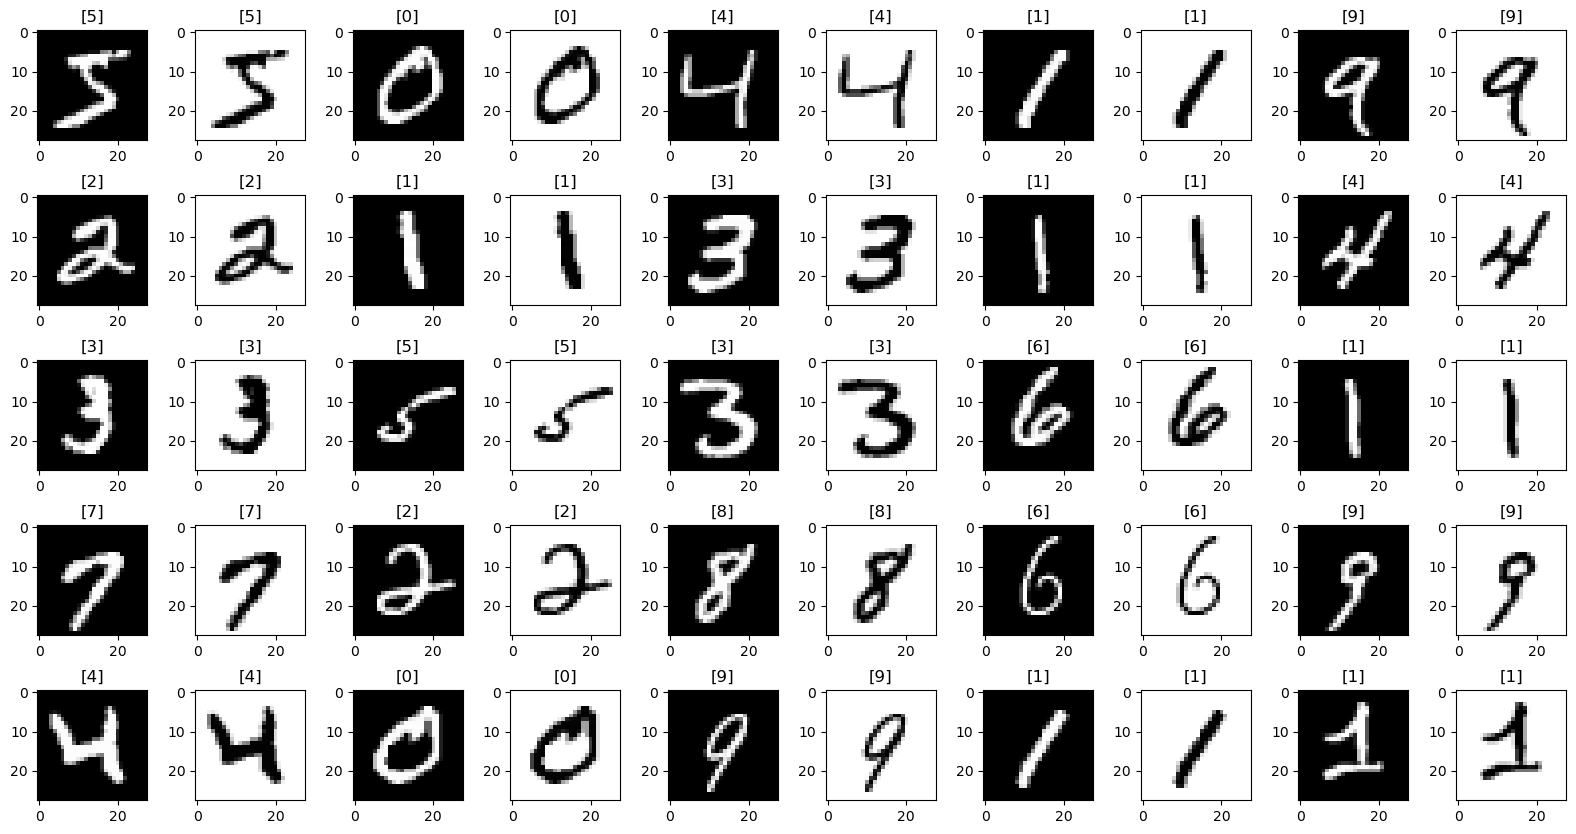

In [2]:
import itertools
import matplotlib
from matplotlib import pyplot as plt

plt.figure(figsize=(20, 10))
for i, item in enumerate(itertools.islice(train_dataset, 0, 50)):
    # print(img, label)
    plt.subplot(5, 10, i+1)
    image, label = item
    plt.title(str(label))
    plt.imshow(image.squeeze(0), cmap=matplotlib.cm.gist_gray)

plt.subplots_adjust(hspace=0.5)
plt.show()

The loss value printed in the log is the current step, and the metric is the average value of previous steps.
Epoch 1/20
step 1875/1875 [==============================] - loss: 0.1577 - acc: 0.8710 - 5ms/step          
Epoch 2/20
step 1875/1875 [==============================] - loss: 0.1942 - acc: 0.9616 - 3ms/step          
Epoch 3/20
step 1875/1875 [==============================] - loss: 0.1043 - acc: 0.9719 - 3ms/step          
Epoch 4/20
step 1875/1875 [==============================] - loss: 0.0767 - acc: 0.9770 - 3ms/step          
Epoch 5/20
step 1875/1875 [==============================] - loss: 0.0099 - acc: 0.9800 - 4ms/step          
Epoch 6/20
step 1875/1875 [==============================] - loss: 0.0100 - acc: 0.9823 - 4ms/step          
Epoch 7/20
step 1875/1875 [==============================] - loss: 0.0229 - acc: 0.9843 - 3ms/step          
Epoch 8/20
step 1875/1875 [==============================] - loss: 0.0793 - acc: 0.9859 - 3ms/step          
Epoch 9/20
step 18

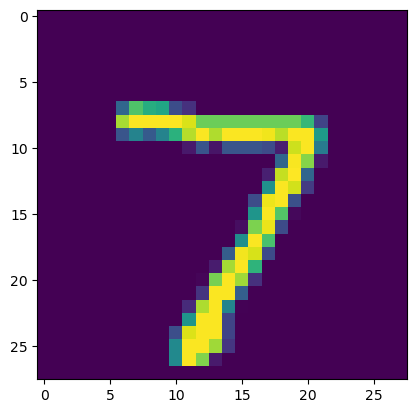

In [3]:
from models.LeNet import LeNet
import paddle
import numpy as np

BATCH_SIZE = 64
LEARNING_RATE = 0.01
EPOCHS = 20
network = LeNet()
model = paddle.Model(network)
def train_model():
    # SGD优化器
    model.prepare(paddle.optimizer.SGD(learning_rate=LEARNING_RATE, parameters=model.parameters()),
                                paddle.nn.CrossEntropyLoss(),
                                paddle.metric.Accuracy())
    # 模型训练
    model.fit(train_dataset, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1)
    # 保存模型
    model.save('./output/LeNet-SGD-0.01-64')

train_model()
# 加载模型
# model.load('output/LeNet-Adam-CrossEntropyLoss')

# 模型评估
model.prepare(paddle.optimizer.SGD(learning_rate=LEARNING_RATE, parameters=model.parameters()),
              paddle.nn.CrossEntropyLoss(),
              paddle.metric.Accuracy())
model.evaluate(test_dataset, batch_size=BATCH_SIZE, verbose=1)

# 从测试集中取出一张图片
img, label = test_dataset[0]
# 将图片shape从1*28*28变为1*1*28*28，增加一个batch维度，以匹配模型输入格式要求
img_batch = np.expand_dims(img.astype('float32'), axis=0)

# 执行推理并打印结果，此处predict_batch返回的是一个list，取出其中数据获得预测结果
out = model.predict_batch(img_batch)[0]
pred_label = out.argmax()
print(f'true label: {label[0]}, pred label: {pred_label}')
# 可视化图片
from matplotlib import pyplot as plt
plt.imshow(img[0])

In [ ]:
from models.LeNet import LeNet
import paddle
import numpy as np

BATCH_SIZE = 64
LEARNING_RATE = 0.01
EPOCHS = 20
network = LeNet()
model = paddle.Model(network)
def train_model():
    # Adam优化器
    model.prepare(paddle.optimizer.Adam(learning_rate=LEARNING_RATE, parameters=model.parameters()),
                  paddle.nn.CrossEntropyLoss(),
                  paddle.metric.Accuracy())
    # 模型训练
    model.fit(train_dataset, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1)
    # 保存模型
    model.save('./output/LeNet-Adam-0.01-64')

train_model()
# 加载模型
# model.load('output/LeNet-Adam-CrossEntropyLoss')

# 模型评估
model.prepare(paddle.optimizer.Adam(learning_rate=LEARNING_RATE, parameters=model.parameters()),
              paddle.nn.CrossEntropyLoss(),
              paddle.metric.Accuracy())
model.evaluate(test_dataset, batch_size=BATCH_SIZE, verbose=1)

# 从测试集中取出一张图片
img, label = test_dataset[0]
# 将图片shape从1*28*28变为1*1*28*28，增加一个batch维度，以匹配模型输入格式要求
img_batch = np.expand_dims(img.astype('float32'), axis=0)

# 执行推理并打印结果，此处predict_batch返回的是一个list，取出其中数据获得预测结果
out = model.predict_batch(img_batch)[0]
pred_label = out.argmax()
print(f'true label: {label[0]}, pred label: {pred_label}')
# 可视化图片
from matplotlib import pyplot as plt
plt.imshow(img[0])

In [ ]:
from models.LeNet import LeNet
import paddle
import numpy as np

BATCH_SIZE = 64
LEARNING_RATE = 0.01
EPOCHS = 20
network = LeNet()
model = paddle.Model(network)
def train_model():
    # Adadelta优化器
    model.prepare(paddle.optimizer.Adadelta(learning_rate=LEARNING_RATE, parameters=model.parameters()),
                  paddle.nn.CrossEntropyLoss(),
                  paddle.metric.Accuracy())
    # 模型训练
    model.fit(train_dataset, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1)
    # 保存模型
    model.save('./output/LeNet-Adadelta-0.01-64')

train_model()
# 加载模型
# model.load('output/LeNet-Adam-CrossEntropyLoss')

# 模型评估
model.prepare(paddle.optimizer.Adadelta(learning_rate=LEARNING_RATE, parameters=model.parameters()),
              paddle.nn.CrossEntropyLoss(),
              paddle.metric.Accuracy())
model.evaluate(test_dataset, batch_size=BATCH_SIZE, verbose=1)

# 从测试集中取出一张图片
img, label = test_dataset[0]
# 将图片shape从1*28*28变为1*1*28*28，增加一个batch维度，以匹配模型输入格式要求
img_batch = np.expand_dims(img.astype('float32'), axis=0)

# 执行推理并打印结果，此处predict_batch返回的是一个list，取出其中数据获得预测结果
out = model.predict_batch(img_batch)[0]
pred_label = out.argmax()
print(f'true label: {label[0]}, pred label: {pred_label}')
# 可视化图片
from matplotlib import pyplot as plt
plt.imshow(img[0])

In [ ]:
from models.LeNet import LeNet
import paddle
import numpy as np

BATCH_SIZE = 64
LEARNING_RATE = 0.01
EPOCHS = 20

network = LeNet()
model = paddle.Model(network)
def train_model():
    # Adagrad优化器
    model.prepare(paddle.optimizer.Adagrad(learning_rate=LEARNING_RATE, parameters=model.parameters()),
                  paddle.nn.CrossEntropyLoss(),
                  paddle.metric.Accuracy())
    # 模型训练
    model.fit(train_dataset, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1)
    # 保存模型
    model.save('./output/LeNet-Adagrad-CrossEntropyLoss')

train_model()
# 加载模型
# model.load('output/LeNet-Adam-CrossEntropyLoss')

# 模型评估
model.prepare(paddle.optimizer.Adagrad(learning_rate=LEARNING_RATE, parameters=model.parameters()),
              paddle.nn.CrossEntropyLoss(),
              paddle.metric.Accuracy())
model.evaluate(test_dataset, batch_size=BATCH_SIZE, verbose=1)

# 从测试集中取出一张图片
img, label = test_dataset[0]
# 将图片shape从1*28*28变为1*1*28*28，增加一个batch维度，以匹配模型输入格式要求
img_batch = np.expand_dims(img.astype('float32'), axis=0)

# 执行推理并打印结果，此处predict_batch返回的是一个list，取出其中数据获得预测结果
out = model.predict_batch(img_batch)[0]
pred_label = out.argmax()
print(f'true label: {label[0]}, pred label: {pred_label}')
# 可视化图片
from matplotlib import pyplot as plt
plt.imshow(img[0])


In [ ]:
from models.LeNet import LeNet
import paddle
import numpy as np

BATCH_SIZE = 64
LEARNING_RATE = 0.01
EPOCHS = 20
network = LeNet()
model = paddle.Model(network)
def train_model():
    # Lamb 优化器
    model.prepare(paddle.optimizer.Lamb(learning_rate=LEARNING_RATE, parameters=model.parameters()),
                  paddle.nn.CrossEntropyLoss(),
                  paddle.metric.Accuracy())
    # 模型训练
    model.fit(train_dataset, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1)
    # 保存模型
    model.save('./output/LeNet-Lamb-0.01-64')

train_model()
# 加载模型
# model.load('output/LeNet-Lamb-0.01-64')

# 模型评估
model.prepare(paddle.optimizer.Lamb(learning_rate=LEARNING_RATE, parameters=model.parameters()),
              paddle.nn.CrossEntropyLoss(),
              paddle.metric.Accuracy())
model.evaluate(test_dataset, batch_size=BATCH_SIZE, verbose=1)

# 从测试集中取出一张图片
img, label = test_dataset[0]
# 将图片shape从1*28*28变为1*1*28*28，增加一个batch维度，以匹配模型输入格式要求
img_batch = np.expand_dims(img.astype('float32'), axis=0)

# 执行推理并打印结果，此处predict_batch返回的是一个list，取出其中数据获得预测结果
out = model.predict_batch(img_batch)[0]
pred_label = out.argmax()
print(f'true label: {label[0]}, pred label: {pred_label}')
# 可视化图片
from matplotlib import pyplot as plt
plt.imshow(img[0])
